**The questions about this dataset:**
1. How can we know if the improvement of Tutorial in-game version 1.6.0 has impacted the User Experience better than in-game
version 1.5.2?
2. Can we roll out 100% game version 1.6.0 to all users or not? Why? (Analyze and evaluate the 2 versions).
3. Based on the data and your experience with the game, do you have any ideas to improve our User Experience? Explain it in detail
(image, text, diagram, logic, game mechanics,...)

In [327]:
# Import all the libraries which will be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import chi2_contingency, ttest_ind

**DATA WRANGLING**

1. *game_end* dataset

In [239]:
# load in game_end dataset and print out the head 
game_end=pd.read_csv('D:/indiez_assign/data/processed/game_end.csv')
game_end.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,48,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0.0,out_of_lives,31,1.6.0
1,49,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,18,1.6.0
2,50,2023-10-28,game_end,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,10,1.6.0
3,51,2023-10-28,game_end,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,9,1.6.0
4,52,2023-10-28,game_end,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,8,1.6.0


In [240]:
# check the rows and columns of game_end dataset
game_end.shape  

(243697, 12)

In [241]:
# check datatypes to see if there are some wrongly categorized types in game_end dataset
game_end.dtypes

event_id           int64
date_time         object
event_name        object
level              int64
user              object
day_diff         float64
day0              object
mode_game         object
win              float64
reason_to_die     object
quantity           int64
version           object
dtype: object

In [242]:
# Convert float columns from float to int
game_end['day_diff'] = game_end['day_diff'].astype(int)
game_end['win'] = game_end['win'].astype(int)

In [243]:
# check each columns number of unique values 
game_end.nunique()

event_id         243697
date_time            14
event_name            1
level               518
user              13042
day_diff              8
day0                  7
mode_game             1
win                   2
reason_to_die         2
quantity           1034
version               2
dtype: int64

In [244]:
# statistic values for game_end dataset
game_end.describe()

,event_id,level,day_diff,win,quantity
count,2.436970e+05,243697.000000,243697.000000,243697.000000,243697.000000
mean,2.451077e+06,25.443284,1.110252,0.518201,47.377797
std,1.382828e+06,44.866007,1.760307,0.499670,89.904959
min,4.800000e+01,1.000000,0.000000,0.000000,2.000000
25%,1.243079e+06,5.000000,0.000000,0.000000,14.000000
50%,2.480019e+06,12.000000,0.000000,1.000000,25.000000
75%,3.581332e+06,23.000000,2.000000,1.000000,49.000000
max,7.501776e+06,518.000000,7.000000,1.000000,15642.000000


In [245]:
game_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243697 entries, 0 to 243696
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   event_id       243697 non-null  int64 
 1   date_time      243697 non-null  object
 2   event_name     243697 non-null  object
 3   level          243697 non-null  int64 
 4   user           243697 non-null  object
 5   day_diff       243697 non-null  int32 
 6   day0           243697 non-null  object
 7   mode_game      243697 non-null  object
 8   win            243697 non-null  int32 
 9   reason_to_die  117413 non-null  object
 10  quantity       243697 non-null  int64 
 11  version        243697 non-null  object
dtypes: int32(2), int64(3), object(7)
memory usage: 20.5+ MB


In [246]:
game_end.isnull().sum()

event_id              0
date_time             0
event_name            0
level                 0
user                  0
day_diff              0
day0                  0
mode_game             0
win                   0
reason_to_die    126284
quantity              0
version               0
dtype: int64

In [247]:
# For all missing data with object as datatype , I fill in with string "unknown"
game_end['reason_to_die'].fillna('unknown',inplace=True) 

In [248]:
# confirm game_end dataset after fillna
game_end.isnull().sum()

event_id         0
date_time        0
event_name       0
level            0
user             0
day_diff         0
day0             0
mode_game        0
win              0
reason_to_die    0
quantity         0
version          0
dtype: int64

In [249]:
# check if there are some duplicates in game_end dataset
game_end.duplicated().sum()

0

In [250]:
# drop the duplicates
game_end.drop_duplicates(inplace=True) 
# confirm again 
game_end.duplicated().sum() 

0

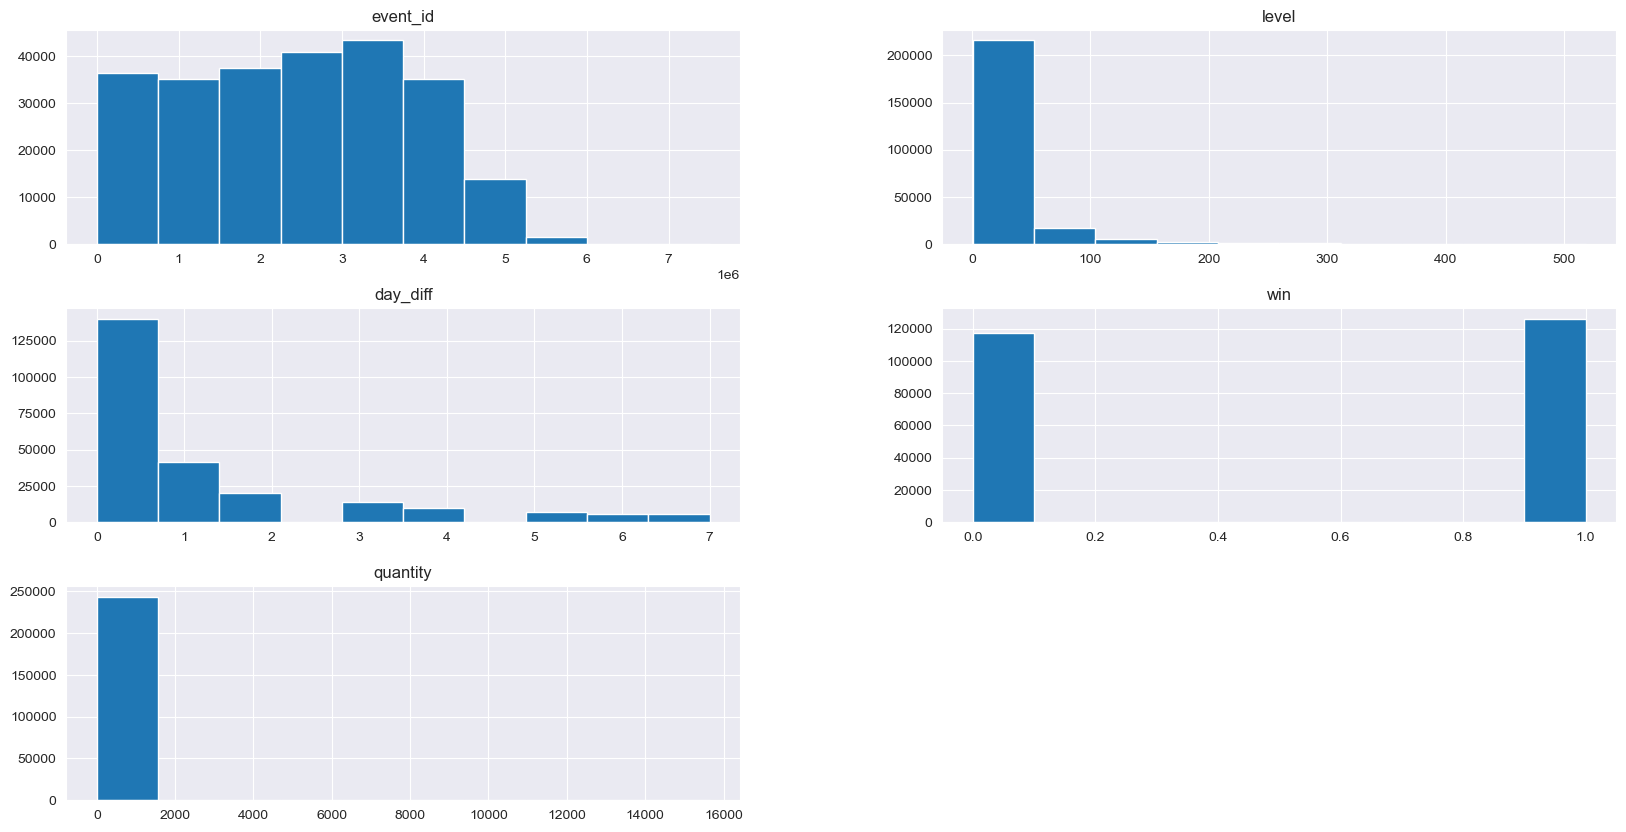

In [251]:
# visulize each variables 
game_end.hist(figsize=(20,10));

2. *game_start* dataset

In [252]:
# load in game_start dataset and print out the head 
game_start=pd.read_csv('D:/indiez_assign/data/processed/game_start.csv')
game_start.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,quantity,version
0,40,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
1,41,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
2,42,2023-10-28,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
3,43,2023-10-28,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
4,44,2023-10-28,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0


In [253]:
# check the rows and columns of game_start dataset
game_start.shape  

(249799, 10)

In [254]:
# check datatypes to see if there are some wrongly categorized types in game_start dataset
game_start.dtypes

event_id        int64
date_time      object
event_name     object
level           int64
user           object
day_diff      float64
day0           object
mode_game      object
quantity        int64
version        object
dtype: object

In [255]:
# Convert float columns from float to int
game_start['day_diff'] = game_start['day_diff'].astype(int)

In [256]:
# check each columns number of unique values 
game_start.nunique()

event_id      249799
date_time         14
event_name         1
level            519
user           13255
day_diff           8
day0               7
mode_game          1
quantity           1
version            2
dtype: int64

In [257]:
# statistic values for game_start dataset
game_start.describe()

,event_id,level,day_diff,quantity
count,2.497990e+05,249799.000000,249799.000000,249799.0
mean,2.450962e+06,25.370042,1.108519,0.0
std,1.382872e+06,44.664307,1.759160,0.0
min,4.000000e+01,1.000000,0.000000,0.0
25%,1.244066e+06,5.000000,0.000000,0.0
50%,2.479657e+06,12.000000,0.000000,0.0
75%,3.581286e+06,23.000000,2.000000,0.0
max,7.501770e+06,519.000000,7.000000,0.0


In [258]:
game_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249799 entries, 0 to 249798
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_id    249799 non-null  int64 
 1   date_time   249799 non-null  object
 2   event_name  249799 non-null  object
 3   level       249799 non-null  int64 
 4   user        249799 non-null  object
 5   day_diff    249799 non-null  int32 
 6   day0        249799 non-null  object
 7   mode_game   249799 non-null  object
 8   quantity    249799 non-null  int64 
 9   version     249799 non-null  object
dtypes: int32(1), int64(3), object(6)
memory usage: 18.1+ MB


In [259]:
game_start.isnull().sum()

event_id      0
date_time     0
event_name    0
level         0
user          0
day_diff      0
day0          0
mode_game     0
quantity      0
version       0
dtype: int64

In [260]:
# check if there are some duplicates in game_start dataset
game_start.duplicated().sum()

0

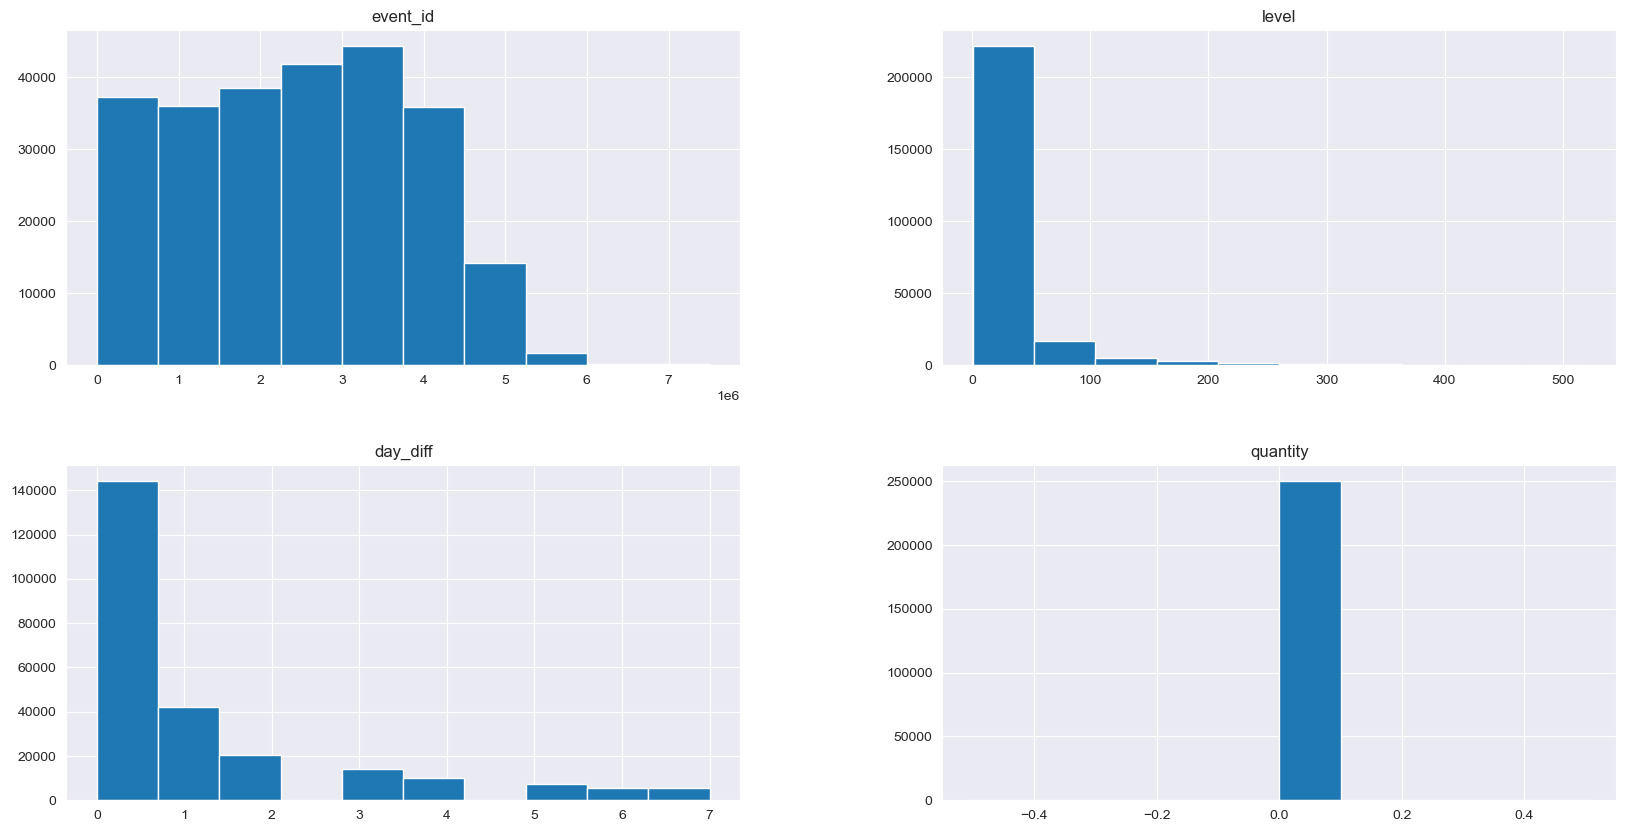

In [261]:
# visualize each variables 
game_start.hist(figsize=(20,10));

3. *tutorial* dataset

In [262]:
# load in tutorial dataset and print out the head 
tutorial=pd.read_csv('D:/indiez_assign/data/processed/tutorial.csv')
tutorial.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,quantity,version
0,147,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,-1,1.6.0
1,148,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,1,1.6.0
2,149,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,2,1.6.0
3,150,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,3,1.6.0
4,151,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,4,1.6.0


In [263]:
# check the rows and columns of tutorial dataset
tutorial.shape  

(108587, 10)

In [264]:
# check datatypes to see if there are some wrongly categorized types in tutorial dataset
tutorial.dtypes

event_id        int64
date_time      object
event_name     object
level           int64
user           object
day_diff      float64
day0           object
mode_game      object
quantity        int64
version        object
dtype: object

In [265]:
# Convert float columns from float to int
tutorial['day_diff'] = tutorial['day_diff'].astype(int)

In [266]:
# check each columns number of unique values 
tutorial.nunique()

event_id      108587
date_time         13
event_name         1
level             41
user           13481
day_diff           8
day0               7
mode_game          1
quantity          11
version            2
dtype: int64

In [267]:
# statistic values for tutorial dataset
tutorial.describe()

,event_id,level,day_diff,quantity
count,1.085870e+05,108587.000000,108587.000000,108587.000000
mean,2.576075e+06,1.216205,0.027020,2.464816
std,1.507411e+06,2.262813,0.301622,2.999546
min,1.470000e+02,1.000000,0.000000,-2.000000
25%,1.403528e+06,1.000000,0.000000,-1.000000
50%,2.567019e+06,1.000000,0.000000,2.000000
75%,3.612922e+06,1.000000,0.000000,4.000000
max,7.938070e+06,92.000000,7.000000,8.000000


In [268]:
tutorial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108587 entries, 0 to 108586
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_id    108587 non-null  int64 
 1   date_time   108587 non-null  object
 2   event_name  108587 non-null  object
 3   level       108587 non-null  int64 
 4   user        108587 non-null  object
 5   day_diff    108587 non-null  int32 
 6   day0        108587 non-null  object
 7   mode_game   108587 non-null  object
 8   quantity    108587 non-null  int64 
 9   version     108587 non-null  object
dtypes: int32(1), int64(3), object(6)
memory usage: 7.9+ MB


In [269]:
tutorial.isnull().sum()

event_id      0
date_time     0
event_name    0
level         0
user          0
day_diff      0
day0          0
mode_game     0
quantity      0
version       0
dtype: int64

In [270]:
# check if there are some duplicates in tutorial dataset
tutorial.duplicated().sum()

0

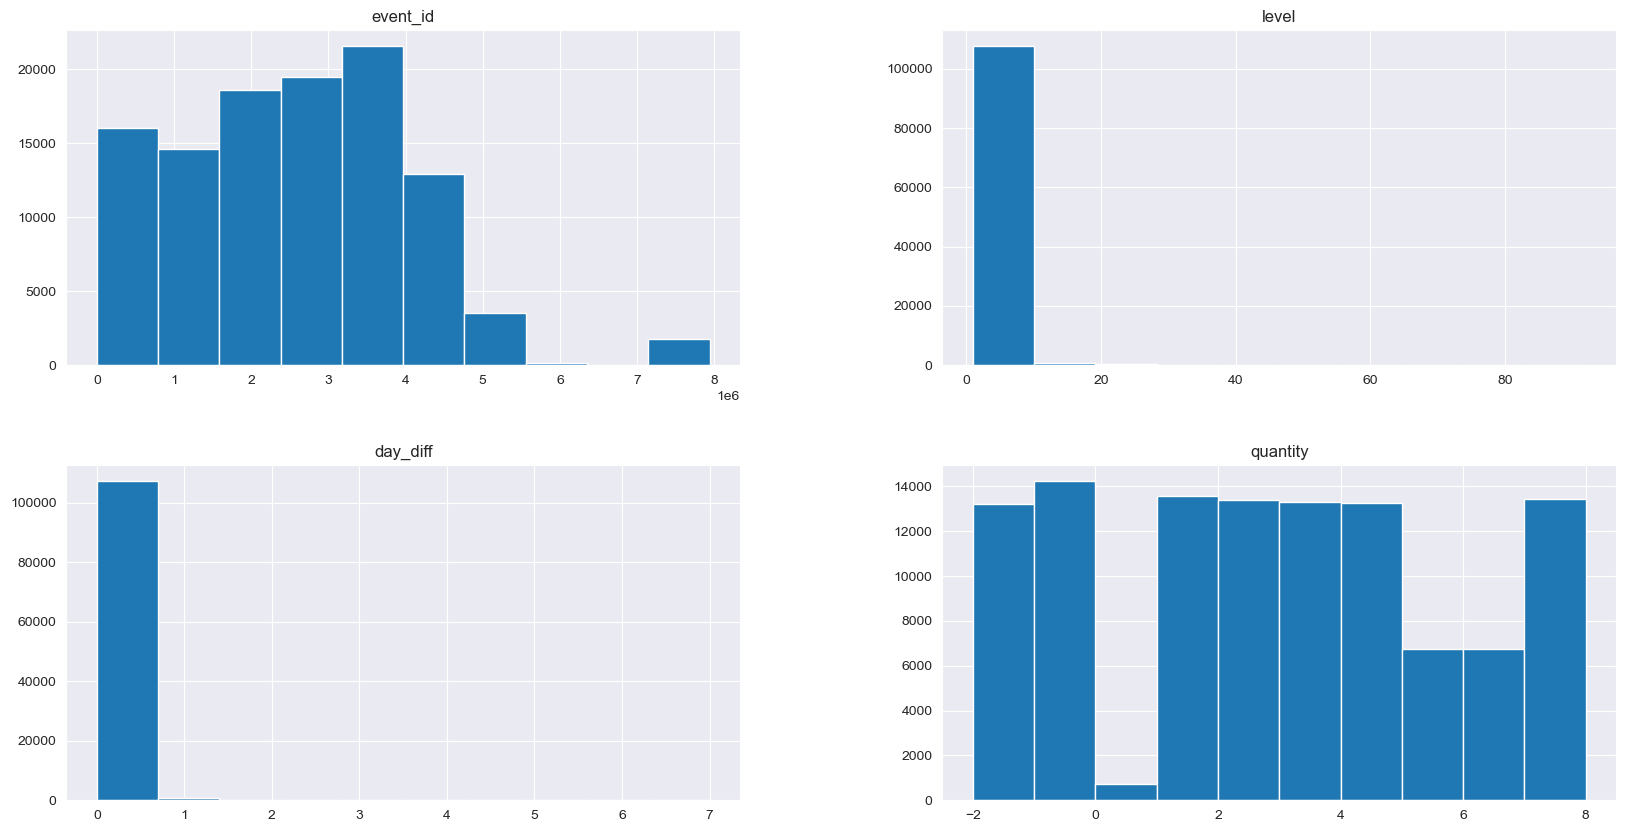

In [271]:
# visualize each variables 
tutorial.hist(figsize=(20,10));

4. *user_engagement* dataset

In [272]:
# load in user_engagement dataset and print out the head 
user_engagement=pd.read_csv('D:/indiez_assign/data/processed/user_engagement.csv')
user_engagement.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,quantity,version
0,162,2023-10-28,user_engagement,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ss,0,1.6.0
1,163,2023-10-28,user_engagement,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0
2,164,2023-10-28,user_engagement,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0
3,165,2023-10-28,user_engagement,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0
4,166,2023-10-28,user_engagement,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0


In [273]:
# check the rows and columns of user_engagement dataset
user_engagement.shape  

(196249, 10)

In [274]:
# check datatypes to see if there are some wrongly categorized types in user_engagement dataset
user_engagement.dtypes

event_id        int64
date_time      object
event_name     object
level           int64
user           object
day_diff      float64
day0           object
mode_game      object
quantity        int64
version        object
dtype: object

In [275]:
# Convert float columns from float to int
user_engagement['day_diff'] = user_engagement['day_diff'].astype(int)

In [276]:
# check each columns number of unique values 
user_engagement.nunique()

event_id      196249
date_time         14
event_name         1
level            500
user           13582
day_diff           8
day0               7
mode_game          2
quantity           1
version            2
dtype: int64

In [277]:
# statistic values for user_engagement dataset
user_engagement.describe()

,event_id,level,day_diff,quantity
count,1.962490e+05,196249.000000,196249.000000,196249.0
mean,2.393093e+06,25.962374,1.262661,0.0
std,1.411244e+06,46.149887,1.863484,0.0
min,1.620000e+02,1.000000,0.000000,0.0
25%,1.189827e+06,4.000000,0.000000,0.0
50%,2.395089e+06,11.000000,0.000000,0.0
75%,3.498081e+06,24.000000,2.000000,0.0
max,7.957952e+06,519.000000,7.000000,0.0


In [278]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196249 entries, 0 to 196248
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_id    196249 non-null  int64 
 1   date_time   196249 non-null  object
 2   event_name  196249 non-null  object
 3   level       196249 non-null  int64 
 4   user        196249 non-null  object
 5   day_diff    196249 non-null  int32 
 6   day0        196249 non-null  object
 7   mode_game   196249 non-null  object
 8   quantity    196249 non-null  int64 
 9   version     196249 non-null  object
dtypes: int32(1), int64(3), object(6)
memory usage: 14.2+ MB


In [279]:
user_engagement.isnull().sum()

event_id      0
date_time     0
event_name    0
level         0
user          0
day_diff      0
day0          0
mode_game     0
quantity      0
version       0
dtype: int64

In [280]:
# check if there are some duplicates in user_engagement dataset
user_engagement.duplicated().sum()

0

In [281]:
# drop the duplicates
user_engagement.drop_duplicates(inplace=True) 
# confirm again 
user_engagement.duplicated().sum()

0

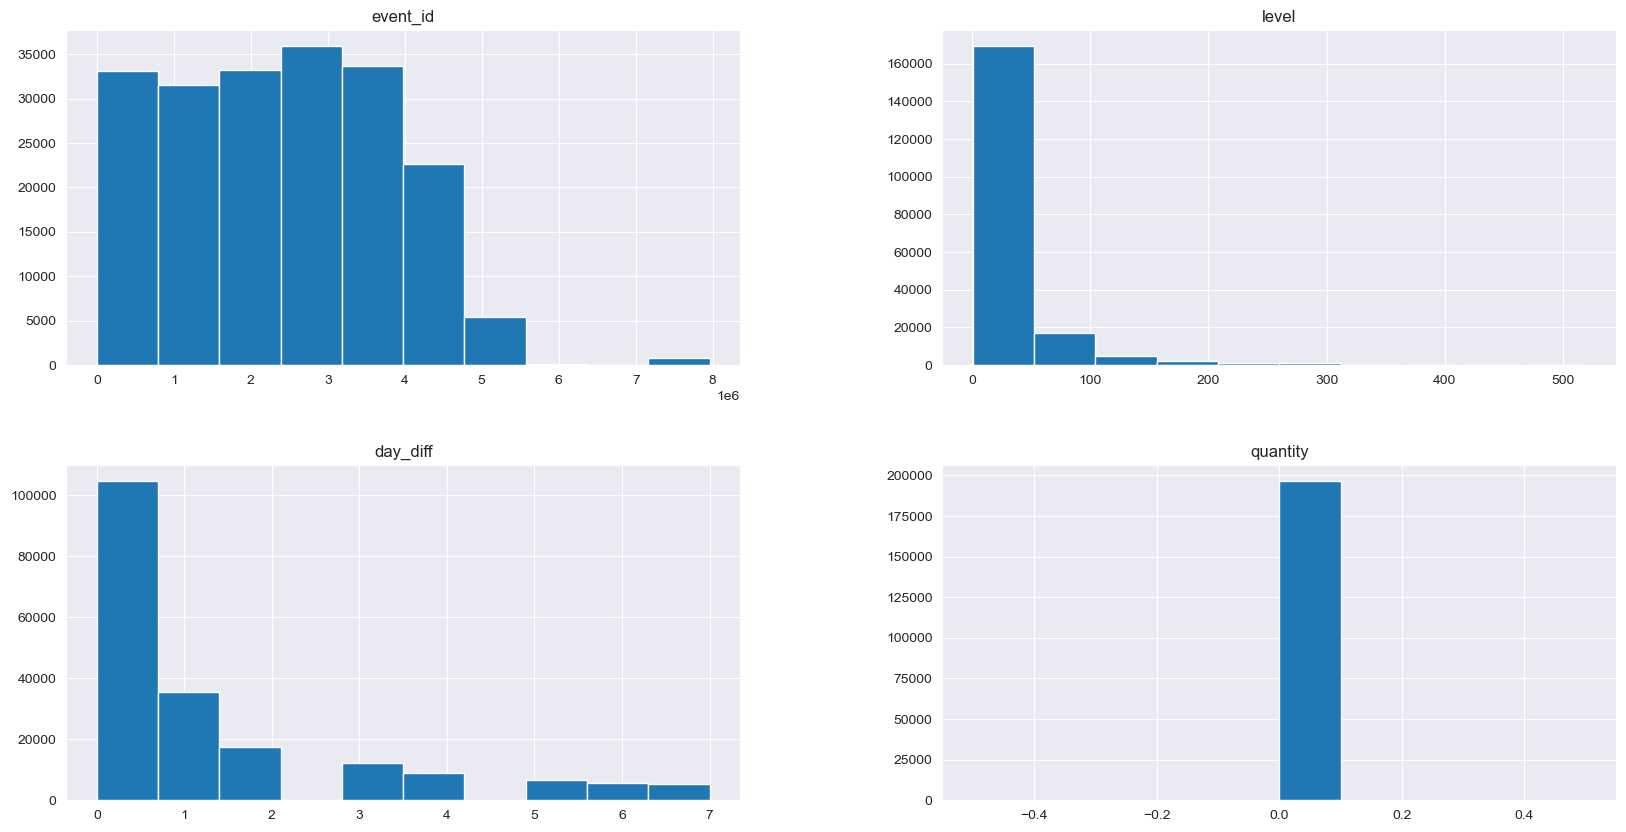

In [282]:
# visualize each variables 
user_engagement.hist(figsize=(20,10));

**EXPLORATION WITH VISUALS AND CONCLUSIONS**


**1. How can we know if the improvement of Tutorial in-game version 1.6.0 has impacted the User Experience better than in-game
version 1.5.2?**


*To see if improving the Tutorial affects user experience, we need to:*
*1.  Consider how long it takes players to pass level 1 after Tutorial step.*
*2.  Compare Tutorial completion rates between the two versions*
*3.  Check if Tutorial is difficult and take too much time to complete*

**2. Can we roll out 100% game version 1.6.0 to all users or not? Why?**
Now, I will try with the above 3 ideas.


***2.1  Consider how long it takes players to pass level 1 after Tutorial step.***

In [283]:
# Filter the DataFrame for rows where the version is '1.5.2'
tutorial_1_5 = tutorial[tutorial['version'] == '1.5.2']
# Extract the 'user' column and drop duplicates, converting to a DataFrame
tutorial_1_5_users = tutorial_1_5[['user']].drop_duplicates().reset_index(drop=True)
tutorial_1_5_users

,user
0,e183eeec-de1c-4bcb-a27a-01e69062f12e
1,c8b50eeb-d799-4986-9f9b-32c4c2ada920
2,3e8d1d60-13d4-4cd8-8ee4-bb454dc46c87
3,a0ef654f-dded-4d4a-a856-0642ab621cc7
4,803dad1b-dd48-47a4-a039-61e5e237cdb2
...,...
6621,d8147156-3279-45f1-a5bd-6e76d9b65345
6622,c34953ed-5a20-4bd8-a28e-75dacef88892
6623,8752b114-c862-4eaf-8195-c33b24fac565
6624,6da32e35-7a19-40d2-9d26-2fad33fa352b


In [284]:
# Filter the DataFrame for rows where the version is '1.5.2'
game_end_1_5 = game_end[(game_end['version'] == '1.5.2') & (game_end['level'] == 1) & (game_end['win'] == 1)]
##Select the necessary columns
game_end_1_5_users = game_end_1_5.loc[:, ['user', 'day_diff']]
game_end_1_5_users.drop_duplicates(inplace=True)
game_end_1_5_users

,user,day_diff
8,e183eeec-de1c-4bcb-a27a-01e69062f12e,0
24,c8b50eeb-d799-4986-9f9b-32c4c2ada920,0
31,3e8d1d60-13d4-4cd8-8ee4-bb454dc46c87,0
37,a0ef654f-dded-4d4a-a856-0642ab621cc7,0
78,803dad1b-dd48-47a4-a039-61e5e237cdb2,0
...,...,...
243094,e84f51ae-a9f2-4298-8e14-3805f250552c,0
243125,3ea69a27-3b84-4dc5-8351-ab948eec4ea3,0
243614,5da08b50-bbac-4cf6-952d-54870fe452e6,7
243625,5b847d95-76dd-4238-9c05-cc5a59ef9efe,5


In [285]:
# Convert float columns from float to int
game_end_1_5_users['day_diff'] = game_end_1_5_users['day_diff'].astype(str)

In [286]:
tut_joined_end_1_5 = tutorial_1_5_users.merge(game_end_1_5_users, on='user', how='left')
tut_joined_end_1_5

,user,day_diff
0,e183eeec-de1c-4bcb-a27a-01e69062f12e,0
1,c8b50eeb-d799-4986-9f9b-32c4c2ada920,0
2,3e8d1d60-13d4-4cd8-8ee4-bb454dc46c87,0
3,a0ef654f-dded-4d4a-a856-0642ab621cc7,0
4,803dad1b-dd48-47a4-a039-61e5e237cdb2,0
...,...,...
6621,d8147156-3279-45f1-a5bd-6e76d9b65345,NaN
6622,c34953ed-5a20-4bd8-a28e-75dacef88892,NaN
6623,8752b114-c862-4eaf-8195-c33b24fac565,NaN
6624,6da32e35-7a19-40d2-9d26-2fad33fa352b,NaN


In [287]:
tut_joined_end_1_5.dtypes

user        object
day_diff    object
dtype: object

In [288]:
tut_joined_end_1_5.isnull().sum()

user          0
day_diff    305
dtype: int64

In [289]:
tut_joined_end_1_5

,user,day_diff
0,e183eeec-de1c-4bcb-a27a-01e69062f12e,0
1,c8b50eeb-d799-4986-9f9b-32c4c2ada920,0
2,3e8d1d60-13d4-4cd8-8ee4-bb454dc46c87,0
3,a0ef654f-dded-4d4a-a856-0642ab621cc7,0
4,803dad1b-dd48-47a4-a039-61e5e237cdb2,0
...,...,...
6621,d8147156-3279-45f1-a5bd-6e76d9b65345,NaN
6622,c34953ed-5a20-4bd8-a28e-75dacef88892,NaN
6623,8752b114-c862-4eaf-8195-c33b24fac565,NaN
6624,6da32e35-7a19-40d2-9d26-2fad33fa352b,NaN


In [290]:
# For all null data with object as datatype in day_diff column, I fill in with string "-1". All user has value "-1" are user drop game in tutorial process
tut_joined_end_1_5.day_diff.fillna('-1', inplace=True)

In [291]:
tut_joined_end_1_5.isnull().sum()

user        0
day_diff    0
dtype: int64

In [308]:
# Convert float columns from float to int
tut_joined_end_1_5['day_diff'] = tut_joined_end_1_5['day_diff'].astype(int)

In [309]:
# Group by 'day_diff' and count the number of users
day_diff_counts_1_5 = tut_joined_end_1_5['day_diff'].value_counts(normalize=True).sort_index() * 100


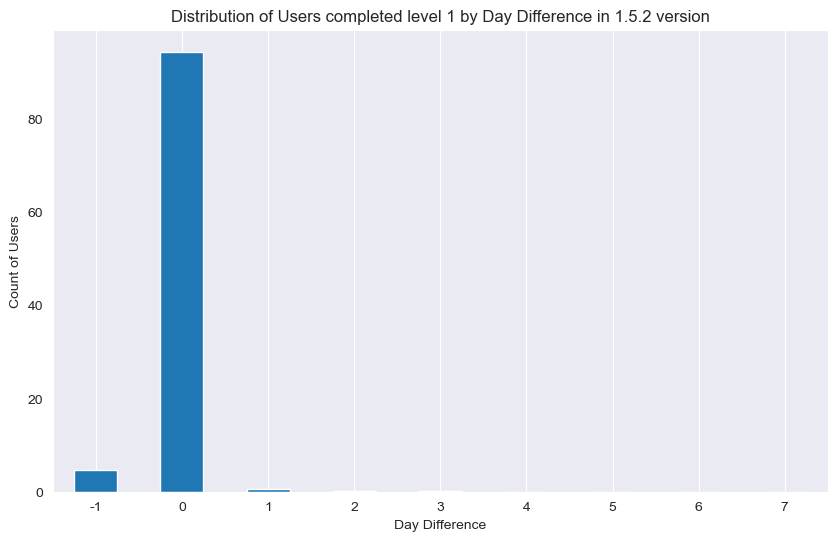

In [310]:
# Plot the distribution
plt.figure(figsize=(10, 6))
day_diff_counts_1_5.plot(kind='bar')
plt.xlabel('Day Difference')
plt.ylabel('Count of Users')
plt.title('Distribution of Users completed level 1 by Day Difference in 1.5.2 version')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [295]:
# Filter the DataFrame for rows where the version is '1.6.0'
tutorial_1_6 = tutorial[tutorial['version'] == '1.6.0']
# Extract the 'user' column and drop duplicates, converting to a DataFrame
tutorial_1_6_users = tutorial_1_6[['user']].drop_duplicates().reset_index(drop=True)
tutorial_1_6_users

,user
0,1cffd052-4616-4d29-bfd5-950e23b763d4
1,a88b3e4e-46f7-4ef9-8e3d-1a5e46560e10
2,d0fb774c-1964-44b3-8987-c1c4002fdc7c
3,9522fccc-f8f7-4b34-aff5-ef9ad19a0ab0
4,7d8e12e8-fde0-4549-bc96-8dd5c7359b15
...,...
6850,b33f3ecf-9bfb-49fd-b44c-fd35c0b9e8cc
6851,886a4318-c999-4af3-b3a0-6d44df16c829
6852,c1018ab32e53fb33f36c404c5a651a85
6853,a3b261f2-34ee-46f0-9144-7e39481fa549


In [296]:
# Filter the DataFrame for rows where the version is '1.6.0'
game_end_1_6 = game_end[(game_end['version'] == '1.6.0') & (game_end['level'] == 1) & (game_end['win'] == 1)]
##Select the necessary columns
game_end_1_6_users = game_end_1_6.loc[:, ['user', 'day_diff']]
game_end_1_6_users.drop_duplicates(inplace=True)
game_end_1_6_users

,user,day_diff
1,1cffd052-4616-4d29-bfd5-950e23b763d4,0
21,a88b3e4e-46f7-4ef9-8e3d-1a5e46560e10,0
23,d0fb774c-1964-44b3-8987-c1c4002fdc7c,0
62,9522fccc-f8f7-4b34-aff5-ef9ad19a0ab0,0
73,7d8e12e8-fde0-4549-bc96-8dd5c7359b15,0
...,...,...
243257,8a8146b9-2fe5-49f2-b52f-d6068a9c2ff2,6
243428,ba98c38e-9426-4f0e-a126-3db4afdc8ad4,0
243506,3e92e5e1-8539-4517-b752-65c27dd52046,0
243546,5e090041-6cfe-4849-ad71-7490df144734,0


In [297]:
# Convert float columns from float to int
game_end_1_6_users['day_diff'] = game_end_1_6_users['day_diff'].astype(str)

In [298]:
tut_joined_end_1_6 = tutorial_1_6_users.merge(game_end_1_6_users, on='user', how='left')
tut_joined_end_1_6

,user,day_diff
0,1cffd052-4616-4d29-bfd5-950e23b763d4,0
1,a88b3e4e-46f7-4ef9-8e3d-1a5e46560e10,0
2,d0fb774c-1964-44b3-8987-c1c4002fdc7c,0
3,9522fccc-f8f7-4b34-aff5-ef9ad19a0ab0,0
4,7d8e12e8-fde0-4549-bc96-8dd5c7359b15,0
...,...,...
6851,b33f3ecf-9bfb-49fd-b44c-fd35c0b9e8cc,NaN
6852,886a4318-c999-4af3-b3a0-6d44df16c829,NaN
6853,c1018ab32e53fb33f36c404c5a651a85,NaN
6854,a3b261f2-34ee-46f0-9144-7e39481fa549,NaN


In [299]:
tut_joined_end_1_6.dtypes

user        object
day_diff    object
dtype: object

In [300]:
tut_joined_end_1_6.isnull().sum()

user          0
day_diff    361
dtype: int64

In [301]:
# For all null data with object as datatype in day_diff column, I fill in with string "-1". All user has value "-1" are user drop game in tutorial process
tut_joined_end_1_6.day_diff.fillna('-1', inplace=True)

In [302]:
tut_joined_end_1_6.isnull().sum()

user        0
day_diff    0
dtype: int64

In [303]:
# Convert float columns from float to int
tut_joined_end_1_6['day_diff'] = tut_joined_end_1_6['day_diff'].astype(int)

In [311]:
# Group by 'day_diff' and count the number of users
day_diff_counts_1_6 = tut_joined_end_1_6['day_diff'].value_counts(normalize=True).sort_index() * 100


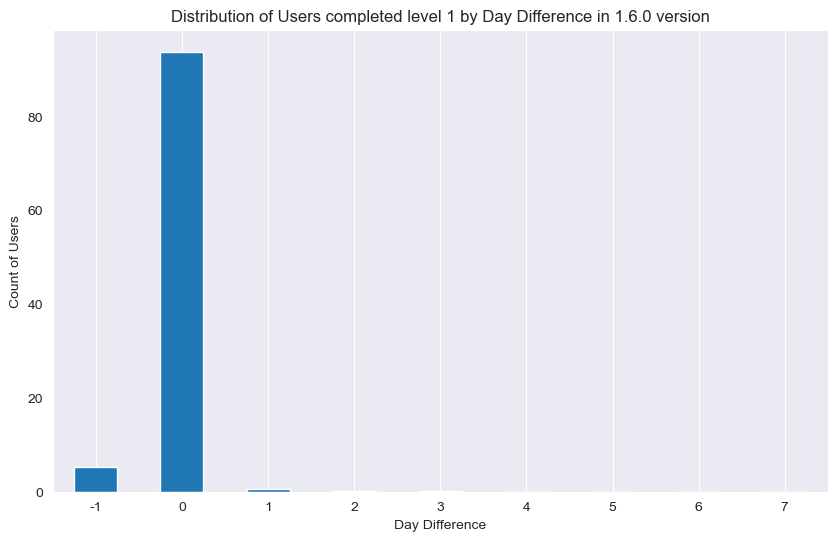

In [312]:
# Plot the distribution
plt.figure(figsize=(10, 6))
day_diff_counts_1_6.plot(kind='bar')
plt.xlabel('Day Difference')
plt.ylabel('Count of Users')
plt.title('Distribution of Users completed level 1 by Day Difference in 1.6.0 version')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

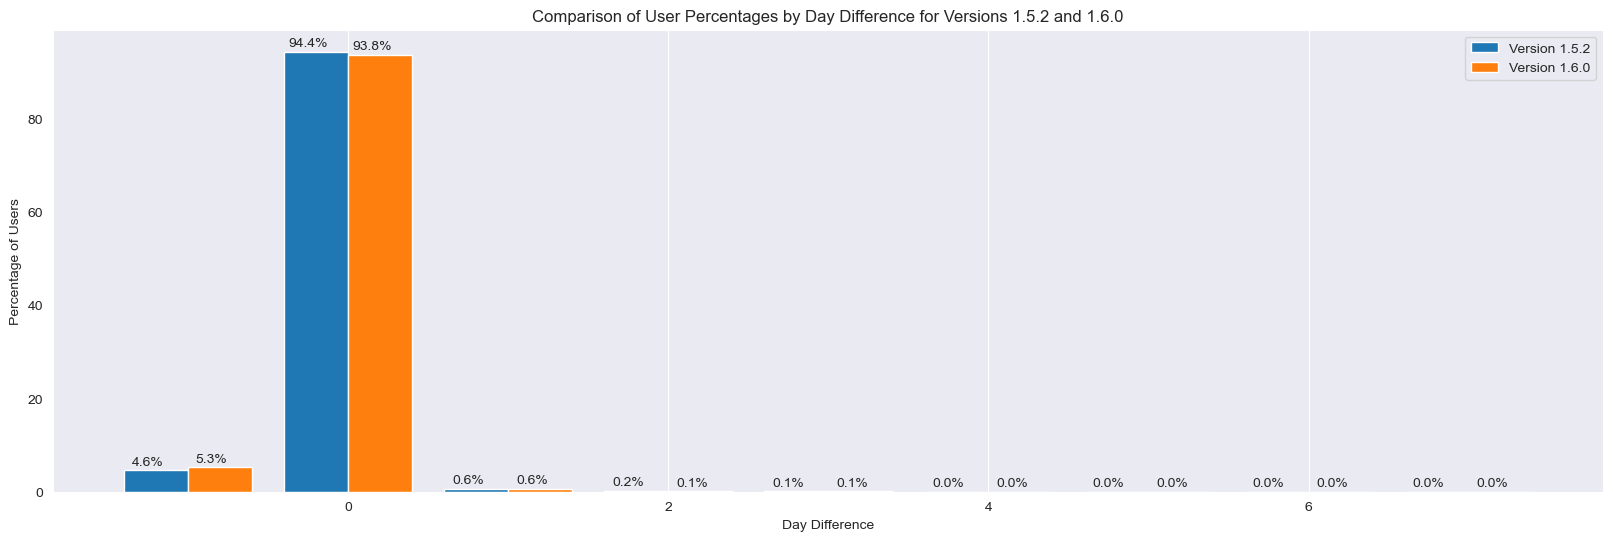

In [316]:
# Plot the distributions on the same chart
plt.figure(figsize=(20, 6))
bar_width = 0.4

# Plot for version 1.5.2
bars_1_5 = plt.bar(day_diff_counts_1_5.index - bar_width/2, day_diff_counts_1_5.values, width=bar_width, label='Version 1.5.2')
# Plot for version 1.6.0
bars_1_6 = plt.bar(day_diff_counts_1_6.index + bar_width/2, day_diff_counts_1_6.values, width=bar_width, label='Version 1.6.0')

# Display values on bars
for bar in bars_1_5:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.5, f'{bar.get_height():.1f}%', ha='center', va='bottom')
for bar in bars_1_6:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.5, f'{bar.get_height():.1f}%', ha='center', va='bottom')

plt.xlabel('Day Difference')
plt.ylabel('Percentage of Users')
plt.title('Comparison of User Percentages by Day Difference for Versions 1.5.2 and 1.6.0')
plt.legend()
plt.grid(axis='y')
plt.show()

***By this chart, we can see:***
*- Percentage of players who cannot complete Tutorial in 1.6.0 version is **higher** than version 1.5.2*
*- Percentage of players who complete level 1 in the first day in 1.6.0 version is **lower** than version 1.5.2*

***2.2  Compare Tutorial completion rates between the two versions***
I apply Chi_Square Test to compare completion rates between two versions ('1.5.2' and '1.6.0')

In [321]:
# Filter tutorial data with "0" value for non-completions and "-2" value for completions
tutorial_1_5_df = tutorial_1_5[tutorial_1_5['quantity'].isin([0, -2])]
tutorial_1_6_df = tutorial_1_6[tutorial_1_6['quantity'].isin([0, -2])]

In [322]:
# Calculate counts of completions (wins) and non-completions (losses)
completion_1_5 = tutorial_1_5_df['quantity'].value_counts()
completion_1_6 = tutorial_1_6_df['quantity'].value_counts()

In [325]:
# Create a contingency table
contingency_table = pd.DataFrame({
    '1.5.2': [completion_1_5.get(-2, 0), completion_1_5.get(0, 0)],
    '1.6.0': [completion_1_6.get(-2, 0), completion_1_6.get(0, 0)]
}, index=['Complete', 'Not Complete'])

print("Contingency Table:")
print(contingency_table)

Contingency Table:
              1.5.2  1.6.0
Complete       6497   6712
Not Complete    359    372


In [326]:
# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test Result:\nChi2: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}\nExpected Frequencies:\n{expected}")


Chi-Square Test Result:
Chi2: 2.783357221770675e-06
P-value: 0.9986688581604647
Degrees of Freedom: 1
Expected Frequencies:
[[6496.47804878 6712.52195122]
 [ 359.52195122  371.47804878]]



*In this test:*

*The Chi-square statistic (Chi2) is very small, specifically **2.783357221770675e-06**. This measures the degree of difference between observed frequencies and expected frequencies if the null hypothesis is false.*

*The P-value is **0.9986688581604647**, which is the probability of obtaining results as extreme as the observed data, assuming the null hypothesis is true. A high P-value suggests that there is insufficient evidence to reject the null hypothesis.*

*Degrees of freedom is **1**, representing the number of independent variables used in the test.*

*The expected frequencies table shows the expected values if the null hypothesis were true, compared to the observed values.*

*Overall, with a high P-value and a very low Chi-square value, we **do not have enough evidence** to conclude that there is a significant difference between version 1.6.0 and version 1.5.2 of the test. Therefore, based on this test result, there is no basis to replace version 1.5.2 with version 1.6.0.*

***2.3  Check if Tutorial is difficult and take too much time to complete***
I apply T-Test to compare completion time between two versions ('1.5.2' and '1.6.0')

In [329]:
# Take the completion data in both versions
tutorial_comp_1_5 = tutorial_1_5[tutorial_1_5['quantity']==2]
tutorial_comp_1_6 = tutorial_1_6[tutorial_1_6['quantity']==2]

In [330]:
# Take the completion time data in both versions
day_tut_complete_1_5 = tutorial_comp_1_5['day_diff']
day_tut_complete_1_6 = tutorial_comp_1_6['day_diff']

In [331]:
# Perform T-test
t_stat, p_value = ttest_ind(day_tut_complete_1_5, day_tut_complete_1_6)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in completion time between versions 1.5.2 and 1.6.0.")
else:
    print("Fail to reject null hypothesis: No significant difference in completion time between versions 1.5.2 and 1.6.0.")

T-Statistic: -0.35056512593317907
P-Value: 0.725920141441057
Fail to reject null hypothesis: No significant difference in completion time between versions 1.5.2 and 1.6.0.



*The interpretation of the result is as follows:*

*T-Statistic: The value is **-0.35056512593317907**. This measures the size of the difference relative to the variation in the data. A negative value indicates that version 1.6.0 tends to have slightly lower completion times compared to version 1.5.2, but this difference is small.*

*P-Value: The P-value is **0.725920141441057**. This is the probability of observing the data if there were no true difference between the versions. A high P-value (greater than 0.05 typically) suggests that there is insufficient evidence to reject the null hypothesis.*

*Based on the P-value being higher than the significance level (commonly 0.05), we fail to reject the null hypothesis. Therefore, there is **no significant difference** in completion time between versions 1.5.2 and 1.6.0. This means that any observed differences in completion times are likely due to random chance rather than a meaningful effect of the version change.*

In practical terms, this result indicates that, statistically speaking, users' completion times **do not significantly differ** between version 1.5.2 and version 1.6.0.

**Conclusion**:
*Based on the 3 criteria I gave at the beginning, we should **not apply** version 1.6.0 to 100% of players. Because in reality, there is almost **no difference** in improvement between the 2 versions 1.5.2 and 1.6.0.

**3.  Based on the data and your experience with the game, do you have any ideas to improve our User Experience??**


***By the data and my experience with the game, I have some suggestion:***

*1. As my above analysis, adding more steps to the tutorial increases the rate of users abandoning the game before reaching level 1. Therefore, I think the tutorial should be reduced, especially for games that are easy to understand and play like Pixel Art.*

*2. About the number, a thick and soft font would fit better with the current font.*

*3. When a number on the sequence is completed correctly, there should be a little special effect before it fades out to mark the completion of the number. Similarly, when a number is made wrong, the rows and columns containing that number will vibrate to make the player pay more attention.*

*4. When user completed a number in column or row, we can give congratulations, encouragement appear like "Well done!" , "Cool!",... to stimulate the player's interest.*

*5. When user completed a level, we need to stand out even more with images and animations and a catchy "CONGRATULATION!" greeting. Consider the following classification of congratulatory messages for completing a level:*
*- Completing without losing any lives would be "PERFECT!"*
*- Completing but not having enough 3 lives or having to use tips would be "GOOD JOB!"*

*6. After a period of time (about 10 seconds), if the player has no interaction in the game, the hint icon should have a highlighting effect to remind the player that it can be used if needed.*

**REFERENCE**

1. https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
3. 4.https://pandas.pydata.org/pandas-docs/stable/visualization.html


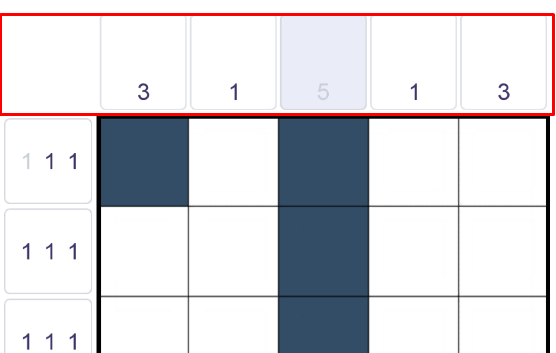